In [2]:
# Step 0. Import libraries and custom modules
# Dataframes and matrices ------------------------------------------------
import pandas as pd
import numpy as np
# Graphics ---------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Text preprocessor ------------------------------------------------------
import re
# import nltk
from nltk.corpus import stopwords
from nltk import ngrams
#from wordcloud import Wordcloud
# PCA decomposition and dimension reduction ------------------------------
from sklearn.decomposition import PCA
# Machine learning -------------------------------------------------------
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# Metrics ----------------------------------------------------------------
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
# Step 1. Read and save the dataset
#data = load_files('./bbc/',encoding='utf-8',decode_error='replace')
#labels, counts = np.unique(data.target, return_counts=True)
#labels_str = np.array(data.target_names)[labels]
#df_raw = pd.DataFrame(data.data, columns=['text'])
#df_raw['target'] = pd.Series(data.target)
#df_raw['target'] = df_raw['target'].map({0:'business', 1:'entertainment', 
#    2:'politics',3:'sport',4:'tech'})

In [3]:
# 1.1 Get a sample of the dataset
df_raw = pd.read_pickle('data/raw_dataset.pkl')
df_raw.sample(10)

,text,target
1148,US actor 'found with gun residue'\n\nActor Rob...,entertainment
25,News Corp eyes video games market\n\nNews Corp...,business
2139,Choose hope over fear - Kennedy\n\nVoters will...,politics
2183,Tarantino 'to make Friday sequel'\n\nDirector ...,entertainment
1870,Player burn-out worries Robinson\n\nEngland co...,sport
1957,Voters 'reject EU by two to one'\n\nBritish vo...,politics
1694,Tories outlining policing plans\n\nLocal commu...,politics
116,Greek pair set for hearing\n\nKostas Kenteris ...,sport
1491,Sydney return for Henin-Hardenne\n\nOlympic ch...,sport
847,Ukraine steel sell-off 'illegal'\n\nThe contro...,business


In [4]:
# 1.2 Save the raw dataset
df_raw.to_pickle('data/raw_dataset.pkl')

In [5]:
# 2. Make an initial subsample and transformation
df = df_raw[(df_raw['target']=='sport') | (df_raw['target']=='business')].\
    reset_index(drop=True).copy()

In [6]:
# 2.1 Count target variables
df.target.value_counts()

sport       511
business    510
Name: target, dtype: int64

In [7]:
# 2.2 Create a text preprocessor
# nltk.download('stopwords') Just in case you need to download
stop_words = stopwords.words('english')
def remove_stopwords(text:str)->str:
    clean_text = []
    if text is not None:
        words = text.split()
        for word in words:
            if word not in stop_words:
                clean_text.append(str(word))
        return ' '.join(clean_text)
    else:
        return None

def remove_symbols(text:str)->str:
    if text is not None:
        text = text.lower()
        text = re.sub(r'''[.,?*&'"+${}-]''','',text)
        text = re.sub(r"\n",' ',text)
        return text
    else:
        return None

df['text_clean'] = df['text'].apply(lambda x: remove_symbols(x))
df['text_clean'] = df['text_clean'].apply(lambda x: remove_stopwords(x))

In [8]:
df

,text,target,text_clean
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,business,tate lyle boss bags top award tate lyles chief...
1,Pavey focuses on indoor success\n\nJo Pavey wi...,sport,pavey focuses indoor success jo pavey miss jan...
2,Costin aims for comeback in 2006\n\nJamie Cost...,sport,costin aims comeback 2006 jamie costin paralys...
3,Almagro continues Spanish surge\n\nUnseeded Ni...,sport,almagro continues spanish surge unseeded nicol...
4,Greene sets sights on world title\n\nMaurice G...,sport,greene sets sights world title maurice greene ...
...,...,...,...
1016,Dallaglio eyeing Lions tour place\n\nFormer En...,sport,dallaglio eyeing lions tour place former engla...
1017,Moya clinches Cup for Spain\n\nSpain won the D...,sport,moya clinches cup spain spain davis cup second...
1018,SBC plans post-takeover job cuts\n\nUS phone c...,business,sbc plans posttakeover job cuts us phone compa...
1019,Tindall aiming to earn Lions spot\n\nBath and ...,sport,tindall aiming earn lions spot bath england ce...


In [9]:
# 3. Now divide the dataset to analyze
X = df['text_clean']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123) 

In [10]:
# Analyze most common words
X_train.apply(lambda x: list(ngrams(x.split(' '),2)))

831    [(newry, fight), (fight, cup), (cup, exit), (e...
203    [(seasonal, lift), (lift, house), (house, mark...
332    [(agassi, fear), (fear, melbourne), (melbourne...
428    [(wasps, 3137), (3137, leicester), (leicester,...
701    [(collins, calls), (calls, chambers), (chamber...
                             ...                        
115    [(asia, shares), (shares, defy), (defy, postqu...
175    [(mystery, surrounds), (surrounds, new), (new,...
276    [(house, prices), (prices, show), (show, sligh...
680    [(injury, sidelines), (sidelines, philippoussi...
865    [(davenport, hits), (hits, wimbledon), (wimble...
Name: text_clean, Length: 765, dtype: object

In [11]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X_unspv = vectorizer.fit_transform(X_train)
kmeans = KMeans(n_clusters = 2, random_state=123)
kmeans.fit(X_unspv)

KMeans(n_clusters=2, random_state=123)

In [12]:
clusters = kmeans.labels_
pca = PCA(n_components=2, random_state=123)
pca_vecs = pca.fit_transform(X_unspv.toarray())
x0 = pca_vecs[:,0]
x1 = pca_vecs[:,1]


In [13]:
pca_df = pd.DataFrame()
pca_df['x0'] = x0
pca_df['x1'] = x1
pca_df['clusters'] = clusters
pca_df['clusters'] = pca_df['clusters'].map({0:'business',1:'sport'})


<AxesSubplot:xlabel='x0', ylabel='x1'>

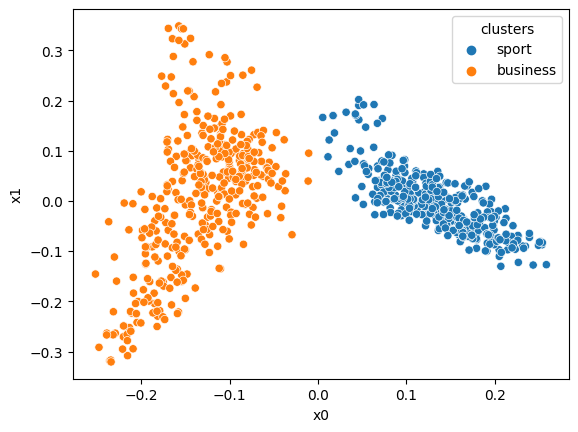

In [14]:
sns.scatterplot(data=pca_df, x='x0', y='x1', hue='clusters')

In [15]:
# Now lets create our model
classifier = Pipeline([
    ('count_vectorizer', CountVectorizer(max_features=200)),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])

classifier.fit(X_train, y_train)


Pipeline(steps=[('count_vectorizer', CountVectorizer(max_features=200)),
                ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

In [16]:
y_pred = classifier.predict(X_test)
classifier.score(X_train, y_train)

0.9934640522875817

In [112]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    business       0.97      0.99      0.98       128
       sport       0.99      0.97      0.98       128

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256

